# Bank Marketing:
## Introduction:
The data is related with direct marketing campaigns of a Portuguese banking institution.

The marketing campaigns were based on phone calls Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

With the provided dataset we are trying to analysis and predict if the clients after marketing campaign will subscribe to term deposit or not.

Portuguese banking institution is our primary client, our goal is to help them identify below details

1. whether their marketing campaign is success,
2. what other methods or changes required to improve their campaign
3. what's the effectiveness of the campaign and points to continue from their last campaign
4. whether they are targeting the right set of audience.

My analysis will help them to make a decision as to how to improve their campaigns so that they can achieve increase in number of clients subscribing to their term deposit.

## Information on dataset:
Bank Marketing Data Set: https://archive.ics.uci.edu/ml/datasets/bank+marketing

We are using below datasets for our analysis

bank-full.csv with all examples and 17 attributes, ordered by date (older version of this dataset with less inputs).
bank.csv with 10% of the examples and 17 attributes, randomly selected from 3 (older version of this dataset with less inputs).

below are the key attributes

* Job
* Education
* Default which provides information if the have any default credit or not
* housing
* loan
* previous outcome of campaign
* whether client has subscribed to term deposit or not.

## Limitations on dataset:
The given dataset has limited amount of data regarding previous campaign's outcome, so its difficult to determine if the previous campaign is successful or not.

## Data cleaning and wrangling:
Data wrangling was done on the dataset - to replace all null and missing fields with unknown. 
The data was present in csv format, using panda's read_csv function we were able to convert them into dataframe and use for our visualization and analysis. 

We did our experiment on two set of data.

## Observations based on preliminary exploration:
Here is the link to data analysis - https://github.com/SoundaryaViji/capstone_project/blob/master/BankDetails.ipynb 


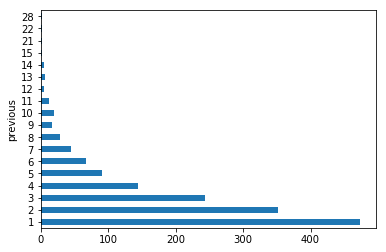

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import collections

df = pd.read_csv('/Users/Sriram/Documents/Soundz_Interview_Prep/learning/springboard/capstoneproject/bank/bank-full.csv',delimiter=";")

df.loc[df["poutcome"] == 'success','previous'].groupby(df['previous']).size().plot(kind = 'barh')



Distribution of clients who have subscribed to term deposit displayed based on the age.
From the below graph we can see clients between the age of 28 to 36 who are the majors ones who have subscribed to term deposit

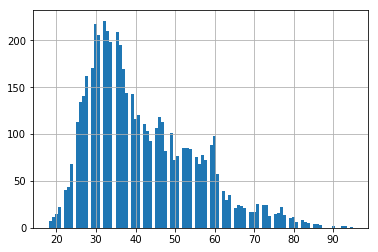

In [2]:
df['res'] = df.loc[df['y'] == 'yes', 'age']
df['res'].hist(bins = 100)

Graph which shows clients who have subscribed to term deposit and their job categories
From the below information the clients in management jobs seem to be subscribing to term deposit then other categories
Top three jobs for which term deposit are larger are Management, Technician,blue-collar jobs

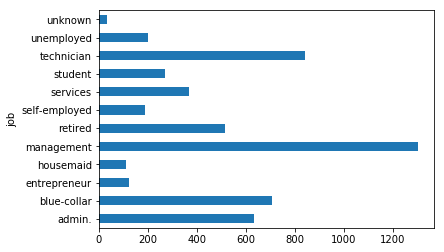

In [3]:

df.loc[df['y'] == 'yes','job'].groupby(df['job']).size().plot(kind = 'barh')


In [4]:
df12 = df.loc[df['y'] == 'yes'].groupby(["month"]).size().reset_index()
df12.columns = ["month","size"]

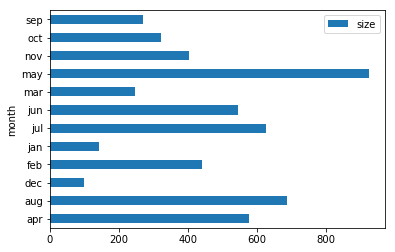

In [5]:
df12.plot(kind='barh',x = 'month',y = 'size')

Month of may has largest number of customers who have subscribed for term despoist, even though the fiscal year in portugal is from jan to dec the term deposit seems to be more on month of May.

## Inference from data analysis

1. From the given data we can observe that the clients who are in management jobs with secondary degree and who doesnt have any loans, in between age of 27 to 37 are the ones who have subscribed to term deposit the most.

2. Protugal has fiscal year from January to December and we expected the term deposit to be more during these months, but it turned out that during month of May there are more number of clients subscribing to term deposit. It may be due to performance apparisal cycle or bonus pay cycle, we dont have substantial information to confirm this.

3. We have around 18 percent of clients who have subscribed to term deposit in our current campaign than pervious campaign.

4. From the campaign results its clear that unemployed clients are not susbcribing to term deposit.Students contribute to very low percentage of clients who subscribed to term deposit.

5. Clients who are married and have management/blue collar and those who are finanically stable are the clients who subscribe for term deposit.

6. With the given data we can observe that for a successful campaign the category of clients we need to contact are ones who are finanically stable.

7. Above analysis provides us with the areas which needed to be improved for getting more clients to subscribe to term deposit.

## Approach:
The inital exploration has been useful to understand trends in the data. The main goal of the project to create a predictive model which can predict if the clients will subscribed to term deposit.

We will use supervised classification models to predict the clients subscription

Below classification model with test and train set data are used to predicted the values for clients subscription
1. Logistic regression
2. Decision Tree
3. SVM
4. Random Forest

We are going to apply these models on two sets of data. 
1. 70-30 train and test split with attributes selected using feature selection RFE
2. 80-20 split with attributes selected from ridgecv.

In [6]:
from IPython.display import HTML
from IPython.display import display
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import csv
import numpy as np
import collections
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import RandomizedLasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import (LogisticRegression, RandomizedLogisticRegression)
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score,recall_score
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
display(tag)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [8]:
data = pd.read_csv('/Users/Sriram/Documents/Soundz_Interview_Prep/learning/springboard/capstone_project/data/bank-full.csv',delimiter=";")
selectedcols=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in selectedcols:
    catlist='var'+'_'+var
    catlist = pd.get_dummies(data[var], prefix=var)
    data1=data.join(catlist)
    data=data1
selectedcols=['job','marital','education','default','housing','loan','contact','month','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in selectedcols]
data_final=data[to_keep]
data_final['y'] = data_final['y'].map({'yes': 1, 'no': 0})
data_final_vars=list(data_final.columns.values)
Y = ['y']
X=[i for i in data_final_vars if i not in Y]
display(tag)

/Users/Sriram/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


Using LassoCV and RidgeCV to estimate cooeficient of the attributes. The values greather than zero indicates feature importance
LassoCV is unstable in a similar way as unregularized linear models are meaning that the coefficients (and thus feature ranks) can vary significantly even on small data changes when there are correlated features in the data. 
So we will use RidgeCV which is L2 regularization.

In [9]:
cols=['job_student','housing_yes','loan_yes','contact_unknown','month_aug', 'month_dec', 'month_feb','month_jan', 'month_jul','month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success','poutcome_unknown'] 
X1=data_final[cols]
Y1=data_final['y']

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
lreg = logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
display(tag)

In [10]:
X2 = data_final[X]
Y2 = data_final[Y]
x_train0, x_test0, y_train0, y_test0 = train_test_split(X2, Y2,test_size =0.3)
model_dt = DecisionTreeClassifier(criterion ="gini")
model_dt.fit(x_train0, y_train0)
y_pred_dt0 = model_dt.predict(x_test0)
fpr_dt, tpr_dt,_ = roc_curve(y_test0, y_pred_dt0)
roc_auc_dt = auc(fpr_dt, tpr_dt)
display(tag)

In [11]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X2, Y2,test_size =0.3)
model_bayes = svm.SVC()

pred_bayes = model_bayes.fit(x_train1, y_train1)
y_pred_bayes = pred_bayes.predict(x_test1)
fprbayes, tprbayes, _= roc_curve(y_test1, y_pred_bayes)
roc_auc_bayes = auc(fprbayes, tprbayes)
display(tag)

/Users/Sriram/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2,test_size =0.3)
model_rf = RandomForestClassifier(max_depth=25, n_estimators = 100)
model_pred = model_rf.fit(x_train2, y_train2)
y_pred_rf = model_rf.predict(x_test2)

fpr_rf, tpr_rf, _ = roc_curve(y_test2, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
display(tag)

/Users/Sriram/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


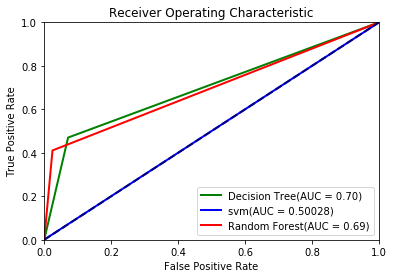

In [13]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot(fprbayes, tprbayes, color='blue',
         lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes)
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
display(tag)

* Logistic - Accuracy of logistic regression classifier on test set: 0.89
* Recall score for logistic regression classifier 0.19
* Decision - Recall score for Decision Tree 0.47
* SVM - Recall score for SVM 0
* Random Forest - Recall score for Random forest 0.41

From the recall score, we observe that decision tree has the highest score compared to other classification techniques.

For predicting if a client will subscribe to term deposit or not, we need to consider tp and fn to calculate the campaign success thus we will be evaluating our models using recall score.(The recall is intuitively the ability of the classifier to find all the positive samples) 

Below lists the recall score and confusion matrix for all the 4 models which we used to do our predictive analysis on.

In [14]:
print('Recall score for logistic regression classifier {:.2f}'.format(recall_score(y_test, y_pred)))
print('Recall score for Decision Tree {:.2f} '.format(recall_score(y_test0, y_pred_dt0)))
print('Recall score for SVM {:.2f}'.format(recall_score(y_test1,y_pred_bayes)))
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test2,y_pred_rf)))

Recall score for logistic regression classifier 0.19
Recall score for Decision Tree 0.47 
Recall score for SVM 0.00
Recall score for Random forest 0.41


In [15]:
print("Confusion matrix with 70-30 \n TN FP\n")
print (" FN TP ")       
print('Confusion Matrix for Logistic regression \n', metrics.confusion_matrix(y_test, y_pred))

print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test0, y_pred_dt0))

print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test1, y_pred_bayes))

print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test2,y_pred_rf))


Confusion matrix with 70-30 
 TN FP

 FN TP 
Confusion Matrix for Logistic regression 
 [[11774   195]
 [ 1289   306]]
Confusion Matrix for Decision Tree 
 [[11133   855]
 [  835   741]]
Confusion Matrix for SVM 
 [[11991     1]
 [ 1571     1]]
Confusion Matrix for Random forest 
  [[11695   297]
 [  926   646]]


From the above confusion matrix, Decision tree has highest recall score - as we are trying to find  all the positive samples, decision tree is best model for our predictive analysis.

SVM has low number of FP and TP, and categorizing all the values as negatives so we cant use SVM for our prediction. 

Logistic Regression and Random forest seems to have similar recall score and lower number of positives.

Looking at the confusion matrix we can conclude that Decision Tree model is better suited for our prediction.


In [16]:
cols1 =['age','balance','day','duration','previous','job_admin.','job_retired','job_student','job_unemployed','marital_divorced','marital_single','education_tertiary','education_unknown','default_no','housing_no','loan_no','contact_cellular','contact_telephone','month_apr','month_dec','month_feb','month_jun','month_mar','month_oct','month_sep','poutcome_success']
X3=data_final[cols1]
Y3=data_final['y']
display(tag)

In [17]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
lreg = logreg.fit(X_train3, y_train3)
y_pred3 = logreg.predict(X_test3)
display(tag)

In [18]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(X3, Y3,test_size =0.2)
model_dt = DecisionTreeClassifier(criterion ="gini")
model_dt.fit(x_train4, y_train4)
y_pred_dt4 = model_dt.predict(x_test4)
fpr_dt, tpr_dt,_ = roc_curve(y_test4, y_pred_dt4)
roc_auc_dt1 = auc(fpr_dt, tpr_dt)
display(tag)

In [19]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(X3, Y3,test_size =0.2)
model_bayes = svm.SVC()

pred_bayes = model_bayes.fit(x_train5, y_train5)
y_pred_bayes5 = pred_bayes.predict(x_test5)
fprbayes, tprbayes, _= roc_curve(y_test5, y_pred_bayes5)
roc_auc_bayes2 = auc(fprbayes, tprbayes)
display(tag)

In [20]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(X3, Y3,test_size =0.2)
model_rf = RandomForestClassifier(max_depth=21)
model_pred = model_rf.fit(x_train6, y_train6)
y_pred_rf6 = model_rf.predict(x_test6)
fpr_rf, tpr_rf, _ = roc_curve(y_test6, y_pred_rf6)
roc_auc_rf3 = auc(fpr_rf, tpr_rf)
display(tag)

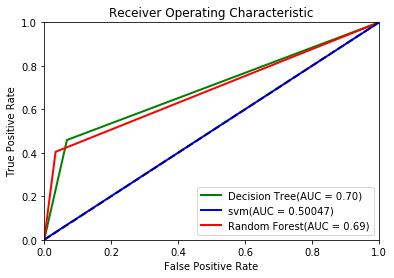

In [21]:
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=2, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt1)
plt.plot(fprbayes, tprbayes, color='blue',
         lw=2, label='svm(AUC = %0.5f)' % roc_auc_bayes2)
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=2, label='Random Forest(AUC = %0.2f)' % roc_auc_rf3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
display(tag)

In [22]:
print('Recall score for logistic regression classifier {:.2f}'.format(metrics.recall_score(y_test3, y_pred3)))
print('Recall score for Decision Tree {:.2f} '.format(metrics.recall_score(y_test4, y_pred_dt4)))
print('Recall score for SVM {:.2f}'.format(recall_score(y_test5,y_pred_bayes5)))
print('Recall score for Random forest {:.2f}'.format(recall_score(y_test6,y_pred_rf6)))

Recall score for logistic regression classifier 0.35
Recall score for Decision Tree 0.46 
Recall score for SVM 0.00
Recall score for Random forest 0.40


In [23]:
print("Confusion matrix with 80-20 \n TN FP\n")
print (" FN TP ")       
print('Confusion Matrix for Logistic regression \n', metrics.confusion_matrix(y_test3, y_pred3))

print('Confusion Matrix for Decision Tree \n',metrics.confusion_matrix(y_test4, y_pred_dt4))

print('Confusion Matrix for SVM \n', metrics.confusion_matrix(y_test5, y_pred_bayes5))

print('Confusion Matrix for Random forest \n ', metrics.confusion_matrix(y_test6,y_pred_rf6))

Confusion matrix with 80-20 
 TN FP

 FN TP 
Confusion Matrix for Logistic regression 
 [[7751  229]
 [ 691  372]]
Confusion Matrix for Decision Tree 
 [[7442  542]
 [ 573  486]]
Confusion Matrix for SVM 
 [[7974    0]
 [1068    1]]
Confusion Matrix for Random forest 
  [[7723  272]
 [ 624  424]]


Similar to our 70-30 split our 80-20% train and test split follows the same hypothesis.

Even though our recall score for logistic and random forest is better then 70-30 split its still lower compare to decision tree.

From the two experiments by varying the number of features selected and test and train split ratio, we can observe that logistic and random forest is behaving slightly better in 80-20 split with features from ridgecv.

We tried changing the value of max depth in random forest but still decision tree provided us with the best recall score in all the scenarios.

We will use decision tree which has highest recall score and higher number of positives from confusion matrix for our prediction model.